# <mark style="font-size:25px">Exemplify and Demonstrate How Matrix factorization technique is used for the Movie Recommendation in Netflix and Amazon Prime platforms.</mark>


**A recommender system is one of unsupervised learning that uses information filtering to suggest products, or content to users based on their preferences, interests, and behavior. These systems are widely used in e-commerce and online streaming settings, and other applications to help discover new products and content that may be of interest to users.**

**Recommender systems are trained to understand user and product preferences, past decisions, and characteristics using data collected about user-product interactions.**

**There are two types of recommendation systems as follows:**

### Content-based Filtering
**The recommendation is based on the user or item attribute as the input to the algorithm. The contents of the shared attribute space are then used to create user and item profiles.**

**For instance, Spider-Man: No Way Home and Ant-Man and the Wasp: Quantumania have similar attributes as both movies are under the Action/Adventure genre. Not only that, both are part of Marvel. Therefore, if Alice watched Spider-Man movie, a content-based recommendation system may recommend movies with similar attributes like action/Marvel movies.**

### <mark>Collaborative Filtering</mark>
<mark>**Based on several users who have similar past interactions. The key idea of this approach is leveraging the concept of collaboration to produce a new recommendation.**

<mark>**For instance, Alice and Bob have similar interests in particular movies genre. A collaborative filtering recommendation system may recommend items to Alice that Bob has watched previously which is new to Alice since both of them have pretty similar preferences. And the reverse is true for Bob as well.**</mark>



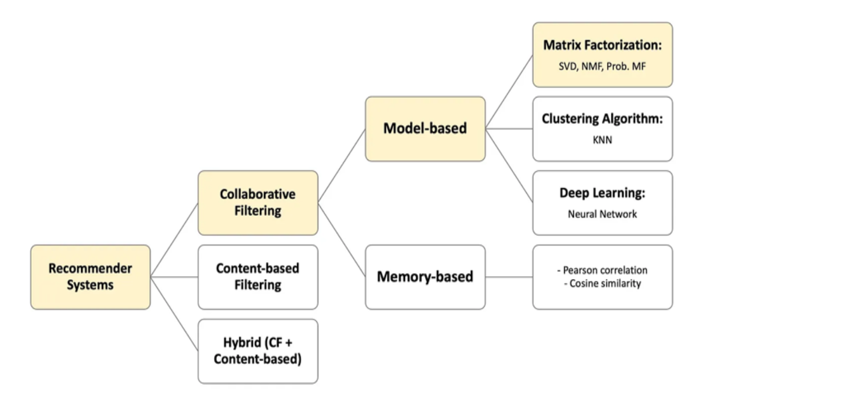

In [2]:
from IPython.display import display
from PIL import Image

input_image_path = "ds1.png"
img = Image.open(input_image_path)

img = img.convert('RGB')

new_size = (850, 400)
resized_img = img.resize(new_size)

display(resized_img)

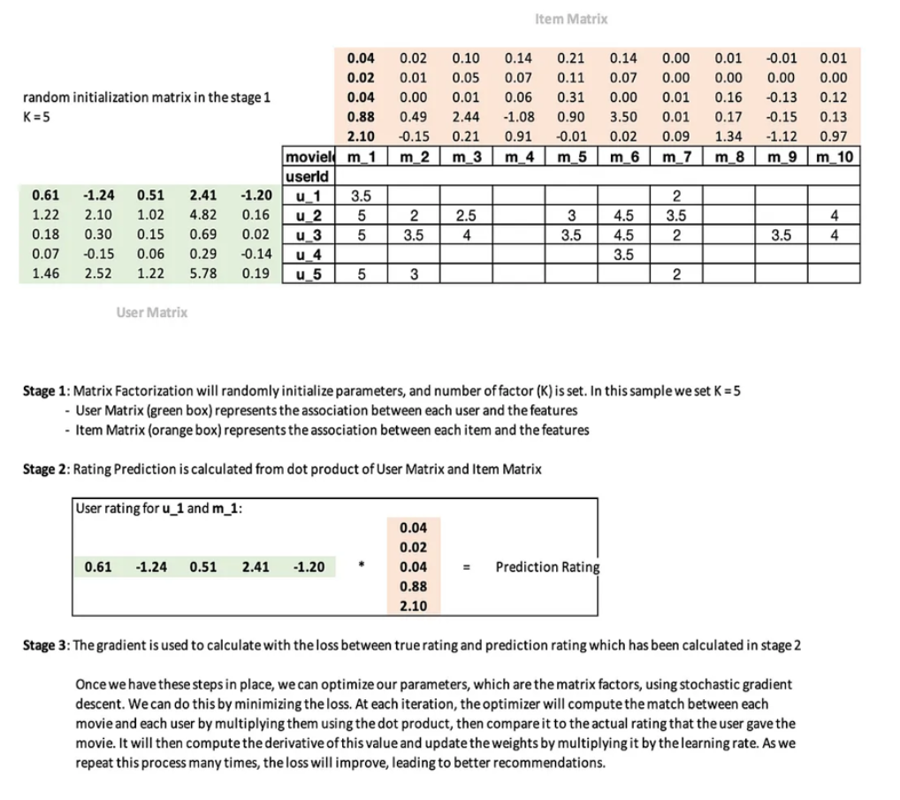

In [1]:
from IPython.display import display
from PIL import Image

input_image_path = "dddd.png"
img = Image.open(input_image_path)
img = img.convert('RGB')
new_size = (900, 800)

resized_img = img.resize(new_size)
display(resized_img)

In [36]:
import pandas as pd

movies = pd.read_csv("C:\\Users\\akhilesh zende\\Downloads\\movies.csv", sep='\t')
print("Movie Dataset:")
print(movies.head())

ratings = pd.read_csv("C:\\Users\\akhilesh zende\\Downloads\\ratings.csv")
print("\nRatings Dataset:")
print(ratings.head())

links = pd.read_csv("C:\\Users\\akhilesh zende\\Downloads\\links.csv")
print("\nLinks Dataset:")
print(links.head())

tags = pd.read_csv("C:\\Users\\akhilesh zende\\Downloads\\tags.csv")
print("\nTags Dataset:")
print(tags.head())


Movie Dataset:
                                movieId,title,genres
0  1,Toy Story (1995),Adventure|Animation|Childre...
1        2,Jumanji (1995),Adventure|Children|Fantasy
2           3,Grumpier Old Men (1995),Comedy|Romance
3    4,Waiting to Exhale (1995),Comedy|Drama|Romance
4        5,Father of the Bride Part II (1995),Comedy

Ratings Dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Links Dataset:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

Tags Dataset:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing 

### Data Preprocessing

**Btw, Collaborative Filtering has a problem with user cold-start. The cold-start problem refers to a situation in which a system or algorithm could not make accurate predictions or recommendations for new users, items, or entities that has no prior information. This can happen when there is little or no historical data available for the new users or items, making it difficult for the system to understand their preferences or characteristics.**

**The cold-start problem is a common challenge in recommendation systems, where the system needs to provide personalized recommendations for users with limited or no interaction history.**

**In this stage, we are going to select users who have at least interacted with 200 movies and movies who have been rated by 100 users (this can be a good way to reduce the size of data and ofc with less null data.)**


In [44]:
import pandas as pd

n_interacted = 200
user_movie_data_temp = pd.pivot_table(ratings, index=['userId'], values='movieId', aggfunc='count')
selected_user_ids = user_movie_data_temp[user_movie_data_temp.movieId >= n_interacted].index
print('Number of userIds: ', str(len(selected_user_ids)))

n_rated = 100
get_rated_movie = pd.pivot_table(ratings, index=['movieId'], values='userId', aggfunc='count')
selected_movie_ids = get_rated_movie[get_rated_movie.userId >= n_rated].index
print('Number of movieIds: ', str(len(selected_movie_ids)))

filtered_ratings = ratings[(ratings['userId'].isin(selected_user_ids)) & (ratings['movieId'].isin(selected_movie_ids))]

filtered_ratings.loc[:, 'movieId'] = filtered_ratings['movieId'].apply(lambda x: 'm_' + str(x))

print('Filtered ratings data shape: ', str(filtered_ratings.shape))


Number of userIds:  134
Number of movieIds:  138
Filtered ratings data shape:  (9871, 4)


### Data Splitting: Training and Testing Sets

**In the customary practice of preparing data for collaborative filtering, the dataset is divided into two essential groups: a training set and a testing set. This division is achieved using the train_test_split method.**

### Data Representation Enhancement

**While the necessary information is available, its presentation may not be optimally comprehensible for humans. To address this, a structured table has been created to present the data in a format that is more human-friendly and facilitates better understanding. This enhanced representation aims to improve the clarity and accessibility of the dataset information.**

In [50]:
from sklearn.model_selection import train_test_split
import numpy as np

train_df, test_df = train_test_split(filtered_ratings, 
                                     stratify=filtered_ratings['userId'],
                                     test_size=0.1,  
                                     random_state=42)

print('train_df size: {}'.format(len(train_df)))
print('test_df size: {}'.format(len(test_df)))

n_latent_factors = 10

nP = np.random.rand(len(train_df['userId'].unique()), n_latent_factors)
nQ = np.random.rand(n_latent_factors, len(train_df['movieId'].unique()))

pred_R = np.dot(nP, nQ)

user_movie_pred = pd.DataFrame(pred_R, columns=train_df['movieId'].unique(), index=train_df['userId'].unique())
print(user_movie_pred.shape)
user_movie_pred.head(10)


train_df size: 8883
test_df size: 988
(134, 138)


,m_293,m_7438,m_4963,m_50,m_648,m_1258,m_500,m_5445,m_356,m_6539,...,m_1923,m_590,m_3147,m_10,m_454,m_185,m_4022,m_434,m_4973,m_329
63,1.761943,2.676107,2.837630,3.102655,2.332599,2.222114,2.699694,1.410624,1.685536,2.181205,...,2.778096,2.763366,2.699012,1.772664,2.731304,2.206889,2.563010,2.838381,2.009984,2.311544
249,1.935656,2.403762,3.012022,3.363844,3.240546,3.029542,2.678046,1.977645,2.092963,2.428762,...,3.172575,3.370945,3.721045,2.792910,3.449290,2.224377,3.285555,3.362295,2.747204,3.626320
325,2.451634,2.480681,2.443676,3.110259,2.351221,1.700406,3.066944,1.372849,2.567517,2.778587,...,2.660857,2.417958,2.879536,1.784949,3.207281,1.786020,2.576159,3.081731,2.226637,2.615988
560,2.597302,3.313975,3.383980,3.551846,3.074158,2.231608,3.401766,2.017121,2.299423,2.374749,...,3.228860,3.158048,3.563364,2.166917,3.530124,2.829583,2.865995,3.384251,2.353226,2.552600
600,1.895508,2.624207,3.395050,3.078336,2.722893,2.414017,3.168179,1.182636,1.981438,2.797533,...,2.415720,2.933639,3.170170,1.894271,3.305989,2.460384,2.885901,3.104780,2.305433,2.420722
462,2.027202,2.804540,2.765692,3.640966,2.675619,2.673592,3.014912,1.859785,2.277036,2.664430,...,2.791318,2.974610,3.225198,2.384639,3.170527,2.281383,3.163391,3.511057,2.502358,3.043084
18,2.632803,3.685939,3.829536,4.526518,3.587967,3.247927,4.041587,2.583807,3.068999,3.159005,...,3.256781,3.851617,4.204123,2.965104,4.288001,3.220493,3.421060,4.183273,3.262767,4.046144
606,1.758856,2.385045,2.330561,2.963821,2.721789,2.230965,2.560205,1.545385,1.665850,2.189803,...,2.337952,2.739249,3.479279,2.036887,2.615171,1.509095,2.664965,2.514259,1.900364,2.542570
105,2.082864,2.797958,2.635099,3.144134,2.238951,2.179663,2.850963,1.624768,2.086993,2.560956,...,2.386078,2.835268,3.298960,2.085333,2.894595,1.996979,2.800606,3.180200,2.043917,2.504369
307,1.363607,1.627259,1.410130,2.000095,1.210967,1.320254,2.012888,1.059399,1.744239,1.851633,...,1.785321,1.594395,1.895361,1.304382,1.892714,1.068858,1.767086,2.021871,1.296507,1.970692


### Implementation of Matrix Factorization in Python from Scratch

**In the following Python snippet, we present an implementation of Matrix Factorization using gradient descent. The matrix_factorization function is designed to return two matrices: nP (user matrix) and nQ (item matrix). This approach is fundamental in collaborative filtering for recommendation systems.**

### Matrix Factorization Overview

**Matrix Factorization is a technique used to decompose a user-item interaction matrix into two lower-dimensional matrices, representing users and items. By doing so, it captures latent features that contribute to user-item interactions. The gradient descent optimization method is employed to iteratively update the user and item matrices, minimizing the difference between the observed and predicted ratings.**

Gradient Descent in Matrix Factorization: The use of gradient descent allows the algorithm to iteratively refine the user and item matrices, minimizing the error between predicted and observed ratings.

Latent Feature Extraction: Matrix Factorization is a powerful technique for capturing latent features that influence user-item interactions, providing a more nuanced understanding of preferences.

Hyperparameters Explanation: The parameters such as learning rate (alpha), regularization parameter (beta), and the number of latent features (K) play crucial roles in the convergence and accuracy of the matrix factorization model.

In [51]:
import numpy as np

def matrix_factorization(R, K, steps=5, alpha=0.002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter
    
    '''
    R = pd.pivot_table(filtered_ratings, values='rating', index='userId', columns='movieId').fillna(0).values

    P = np.random.rand(len(R), K)
    Q = np.random.rand(len(R[0]), K)
    Q = Q.T

    for step in range(steps):
        print('Processing epoch {}'.format(step))

        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i, :], Q[:, j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = np.dot(P, Q)

        e = 0

        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        # 0.001: local minimum
        if e < 0.001:
            break

    return P, Q.T

K = 10 
nP, nQ = matrix_factorization(filtered_ratings, K)

user_movie_pred = pd.DataFrame(np.dot(nP, nQ.T), columns=filtered_ratings['movieId'].unique(), index=filtered_ratings['userId'].unique())
print(user_movie_pred.shape)
user_movie_pred.head(10)


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
(134, 138)


,m_1,m_6,m_47,m_50,m_110,m_223,m_231,m_260,m_296,m_316,...,m_44191,m_48516,m_58559,m_68954,m_79132,m_1200,m_4022,m_4878,m_60069,m_39
1,4.644381,3.777998,4.189610,4.443279,4.845134,4.471436,3.936813,4.191680,4.561324,4.890901,...,3.573078,4.749597,4.810585,4.617486,3.706602,4.401662,4.898720,4.224931,4.473766,4.469283
4,3.203890,2.629132,3.321358,3.491413,3.823154,3.129567,3.539444,3.248105,3.773024,3.855985,...,2.620774,3.387564,3.631364,3.480964,2.987869,3.111943,4.136471,3.079232,3.875491,3.740012
6,4.068987,3.442735,3.918444,4.209085,4.687805,3.919823,4.143614,4.237336,4.623461,4.548325,...,3.148545,4.569737,4.531468,4.323401,3.491937,4.253162,4.764073,4.242077,4.615769,4.240953
18,4.047754,3.546967,3.810848,3.895618,4.445245,4.193138,3.741128,3.866106,4.182747,4.545739,...,3.437759,4.437721,4.344894,4.299325,3.359332,4.064495,4.303612,3.813736,4.077967,4.144328
19,3.642327,3.212046,3.437660,3.433679,3.523371,3.636693,3.705983,3.641771,3.886048,3.977696,...,2.690672,3.956578,3.802782,3.703958,3.218136,3.972324,4.175260,3.181887,3.681557,3.692031
20,3.611701,3.543567,4.136743,4.291203,4.287531,3.658322,3.853099,4.093388,4.009764,3.793383,...,2.970725,3.881897,4.099274,3.770850,3.085703,4.050096,4.657855,4.129454,4.063171,3.724183
21,3.216098,3.011906,3.171179,3.452166,3.688564,3.537908,3.475745,3.686741,3.681372,3.553781,...,2.747293,3.840996,3.346730,3.745114,2.559065,3.621386,3.510451,3.446755,3.564935,3.348590
28,3.419455,2.667244,3.117840,3.557315,3.473425,3.406122,3.024120,3.300833,3.537068,3.442540,...,2.493634,3.731456,3.249459,3.293374,2.710291,3.607662,3.907153,3.155328,3.171654,3.153104
41,3.234298,2.927251,3.199973,3.507664,3.449104,3.708975,3.080980,3.197101,3.269432,3.665112,...,2.920614,3.504802,3.286029,3.470106,2.734374,3.322531,3.618170,2.939968,2.985896,3.355123
42,4.081822,3.735262,3.952753,4.260195,4.479618,4.006014,4.265053,4.484025,4.488187,4.233237,...,3.116249,4.399718,4.347668,4.575799,3.062301,4.272557,4.295120,4.342535,4.599743,4.127442


### Model Training and Prediction with Matrix Factorization

**In this phase, the Matrix Factorization model is trained using the provided training dataset. The model is configured with a set number of latent factors (K = 5). After fitting the training data, predictions are generated by multiplying the user matrix (nP) with the transpose of the item matrix (nQ) using the dot product method.**

### Final Prediction Output

**The final predictions produced by the Matrix Factorization model provide an estimate of user-item interactions based on the learned latent features. These predictions serve as a foundation for generating personalized recommendations in collaborative filtering systems. The model has been fine-tuned through the training process to capture underlying patterns in the training dataset, facilitating more accurate predictions for unseen user-item pairs.**

In [52]:

R_train = pd.pivot_table(train_df, values='rating', index='userId', columns='movieId').fillna(0).values

nP_train, nQ_train = matrix_factorization(R_train, K=10)

pred_R_train = np.dot(nP_train, nQ_train.T)

user_movie_pred_train = pd.DataFrame(pred_R_train, columns=train_df['movieId'].unique(), index=train_df['userId'].unique())
print(user_movie_pred_train.shape)
user_movie_pred_train.head(10)


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
(134, 138)


,m_293,m_7438,m_4963,m_50,m_648,m_1258,m_500,m_5445,m_356,m_6539,...,m_1923,m_590,m_3147,m_10,m_454,m_185,m_4022,m_434,m_4973,m_329
63,4.546336,3.846633,4.391682,4.418585,4.868130,4.314743,4.184380,4.491655,4.691427,4.504472,...,3.415989,4.575621,4.563511,4.464603,3.828231,4.772718,4.972633,4.471910,4.674025,4.587750
249,3.641495,3.052428,3.522747,3.700131,4.044694,3.494338,3.336072,3.627381,3.722830,3.598074,...,2.554270,3.556788,3.645000,3.557061,3.073683,3.608520,3.887389,3.589613,3.823008,3.717712
325,4.381155,4.149799,3.958589,4.161686,4.591746,4.262899,4.289985,4.382028,4.570157,4.846208,...,3.160902,4.429019,4.326433,4.750015,3.645251,4.431425,4.777130,3.849338,4.355536,4.481163
560,3.810727,3.306380,4.164933,4.190640,4.317597,3.709285,3.824116,4.201830,4.052853,3.740950,...,2.940809,3.918713,3.900779,3.597513,3.237881,4.208091,4.526737,4.270548,4.415356,4.153781
600,3.608638,2.972080,3.432027,3.727113,3.903630,3.499774,3.600284,3.599547,3.793124,3.785775,...,2.521989,3.815905,3.812663,3.824492,2.906494,3.705836,3.872290,3.347344,3.839275,3.628302
462,4.284045,2.986665,4.355105,4.044897,4.544873,4.133388,4.065293,4.037868,4.547852,4.238987,...,2.968075,4.888750,4.608917,4.173410,3.477889,4.588435,4.453863,4.214910,4.854021,4.101842
18,3.193891,2.950753,3.131067,3.509119,3.901028,3.362488,3.309247,3.718193,3.923831,3.731497,...,2.473571,3.512652,3.849146,3.664623,2.733029,3.098080,3.768602,3.259973,3.703989,3.198787
606,3.235430,2.476972,3.089764,3.339936,3.375418,3.113780,3.204140,3.287270,3.410821,3.232528,...,2.429770,3.539345,3.510054,3.345129,2.513702,3.436170,3.514131,3.052344,3.457765,3.185540
105,3.110711,2.712646,2.856966,2.958197,3.271691,2.990508,3.472752,3.139936,3.414045,3.621052,...,2.486457,3.715627,3.486899,3.612406,2.239870,3.518452,3.722118,2.835302,3.089288,2.845656
307,3.744449,3.670790,4.146467,4.166923,4.402439,3.755176,4.075741,4.061133,4.721320,4.365507,...,3.139718,4.158304,4.455993,4.360791,3.649808,4.698414,4.649435,4.046089,4.468252,4.175108


### Prediction on the Test Set
**The following snippet leverages the given nP (user matrix) and nQ (movie matrix) to make a prediction on the test set**

In [54]:
Pu = pd.DataFrame(nP, index=train_df['userId'].unique())

Qu = pd.DataFrame(nQ, index=train_df['movieId'].unique())

def predict_rating(data):
    try:
        pred_rating = np.dot(Pu.loc[data.userId], Qu.loc[data.movieId].T)
    except Exception as e:
        pred_rating = np.nan
        print('Unknown user: {} or movieId: {}'.format(data.userId, data.movieId))

    return pred_rating

test_df['pred_rating'] = test_df.apply(predict_rating, axis=1)
test_df.head()


,userId,movieId,rating,timestamp,pred_rating
13115,84,m_223,5.0,857653693,3.961814
22854,156,m_1580,3.0,946799679,3.298253
16217,105,m_32,3.5,1446571805,3.628972
92236,597,m_780,1.0,941729029,3.418415
45729,304,m_2,4.0,891173962,4.037476


### Evaluating The Prediction Performance
**Although there are various evaluation metrics for Recommender Systems, such as Precision@K, Recall@K, MAP@K, and the list goes on. For this exercise, we will employ a basic accuracy metric namely RMSE. We probably will write other evaluation metrics in greater detail in the subsequent article.**

In [55]:
from sklearn.metrics import mean_squared_error

rmse_test = mean_squared_error(test_df['rating'], test_df['pred_rating'], squared=False)

print('RMSE for the test set: {:.4f}'.format(rmse_test))


RMSE for the test set: 1.0663


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

merged_df = pd.merge(ratings_df, movies_df, on='movieId')

user_item_matrix = merged_df.pivot_table(index='userId', columns='movieId', values='rating')

user_item_matrix = user_item_matrix.fillna(0)

train_data, test_data = train_test_split(user_item_matrix.values, test_size=0.25, random_state=42)

n_latent_factors = 10

# Initialize user and item matrices
Pu = pd.DataFrame(np.random.rand(user_item_matrix.shape[0], n_latent_factors), index=user_item_matrix.index)
Qi = pd.DataFrame(np.random.rand(user_item_matrix.shape[1], n_latent_factors), index=user_item_matrix.columns)

learning_rate = 0.01
num_epochs = 10

for epoch in range(num_epochs):
    for i, row in enumerate(train_data):
        for j, rating in enumerate(row):
            if rating > 0:
                error = rating - np.dot(Pu.loc[user_item_matrix.index[i]], Qi.loc[user_item_matrix.columns[j]].T)
                Pu.loc[user_item_matrix.index[i]] += learning_rate * (error * Qi.loc[user_item_matrix.columns[j]])
                Qi.loc[user_item_matrix.columns[j]] += learning_rate * (error * Pu.loc[user_item_matrix.index[i]])

predictions = []

for i, row in enumerate(test_data):
    for j, rating in enumerate(row):
        if rating > 0:
            pred_rating = np.dot(Pu.loc[user_item_matrix.index[i]], Qi.loc[user_item_matrix.columns[j]].T)
            predictions.append(pred_rating)

rmse = sqrt(mean_squared_error(test_data[test_data > 0], predictions))
print("RMSE:", rmse)

top_n = pd.DataFrame(index=user_item_matrix.index, columns=range(10))

for i, user_id in enumerate(user_item_matrix.index):
    user_ratings = []
    for j, movie_id in enumerate(user_item_matrix.columns):
        if user_item_matrix.loc[user_id, movie_id] == 0:
            pred_rating = np.dot(Pu.loc[user_id], Qi.loc[movie_id].T)
            user_ratings.append((movie_id, pred_rating))
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    top_n.iloc[i] = [movie_id for movie_id, _ in user_ratings[:10]]


print(top_n)


RMSE: 1.072277276160538
             0       1       2       3       4       5       6       7      8  \
userId                                                                          
1       151781    8477  137218  146028    2239   80083    4061   95201   2824   
2       174053  166203   72330    3451    7118    5912    2156   80083   2202   
3         2202  137218     318    2156   80083  166203  129333    1349  72330   
4       148881    6057  174053  166203   72330  106642    1217    4495   3468   
5        81819   48394   73808   26073    4422    3451    2202  148978   8370   
...        ...     ...     ...     ...     ...     ...     ...     ...    ...   
606      73808  166203    4021   72330    1104   92535    5747   80083   8238   
607     137218  164280    8477     720    3836  129333   26394  164367  69227   
608       1217  148881  166203    3468    5607    6818   69469    3088   2351   
609      33660    3089   81819   26073    4422     866  129333    2202  84553   
610 

In [69]:
for user_id in user_item_matrix.index[:10]:
    user_ratings = []
    for movie_id in user_item_matrix.columns:
        if user_item_matrix.loc[user_id, movie_id] == 0:
            pred_rating = np.dot(Pu.loc[user_id], Qi.loc[movie_id].T)
            user_ratings.append((movie_id, pred_rating))
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    

    print(f"\nUser {user_id} - Recommended Movies:")
    for movie_id, _ in user_ratings[:10]:
        movie_name = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
        print(f"{movie_name} (movieId: {movie_id})")



User 1 - Recommended Movies:
Ghost in the Shell: Solid State Society (2006) (movieId: 151781)
Jetée, La (1962) (movieId: 8477)
April Morning (1988) (movieId: 137218)
The Adventures of Sherlock Holmes and Dr. Watson: The Hound of the Baskervilles (1981) (movieId: 146028)
Swept Away (Travolti da un insolito destino nell'azzurro mare d'Agosto) (1975) (movieId: 2239)
Dragon Ball Z: Dead Zone (Doragon bôru Z 1: Ora no Gohan wo kaese) (1989) (movieId: 80083)
The Man in the Moon (1991) (movieId: 4061)
To Rome with Love (2012) (movieId: 95201)
On the Ropes (1999) (movieId: 2824)
Sapphire Blue (2014) (movieId: 166203)

User 2 - Recommended Movies:
Black Mirror: White Christmas (2014) (movieId: 174053)
Sapphire Blue (2014) (movieId: 166203)
Private Lives of Pippa Lee, The (2009) (movieId: 72330)
Guess Who's Coming to Dinner (1967) (movieId: 3451)
Wings of Honneamise (Ôritsu uchûgun Oneamisu no tsubasa) (1987) (movieId: 7118)
Hit the Bank (Vabank) (1981) (movieId: 5912)
Best Man, The (Testimone 